In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [72]:
df = pd.read_csv("justiceCentered.csv", encoding= 'unicode_escape')
df.head()

,caseId,docketId,caseIssuesId,voteId,dateDecision,decisionType,usCite,sctCite,ledCite,lexisCite,...,majVotes,minVotes,justice,justiceName,vote,opinion,direction,majority,firstAgreement,secondAgreement
0,2000-001,2000-001-01,2000-001-01-01,2000-001-01-01-01-01,10/10/2000,4,531 U.S. 1,121 S. Ct. 292,148 L. Ed. 2d 1,2000 U.S. LEXIS 6841,...,9,0,102,WHRehnquist,1.0,1.0,2.0,2.0,NaN,NaN
1,2000-001,2000-001-01,2000-001-01-01,2000-001-01-01-01-02,10/10/2000,4,531 U.S. 1,121 S. Ct. 292,148 L. Ed. 2d 1,2000 U.S. LEXIS 6841,...,9,0,103,JPStevens,1.0,1.0,2.0,2.0,NaN,NaN
2,2000-001,2000-001-01,2000-001-01-01,2000-001-01-01-01-03,10/10/2000,4,531 U.S. 1,121 S. Ct. 292,148 L. Ed. 2d 1,2000 U.S. LEXIS 6841,...,9,0,104,SDOConnor,1.0,1.0,2.0,2.0,NaN,NaN
3,2000-001,2000-001-01,2000-001-01-01,2000-001-01-01-01-04,10/10/2000,4,531 U.S. 1,121 S. Ct. 292,148 L. Ed. 2d 1,2000 U.S. LEXIS 6841,...,9,0,105,AScalia,1.0,1.0,2.0,2.0,NaN,NaN
4,2000-001,2000-001-01,2000-001-01-01,2000-001-01-01-01-05,10/10/2000,4,531 U.S. 1,121 S. Ct. 292,148 L. Ed. 2d 1,2000 U.S. LEXIS 6841,...,9,0,106,AMKennedy,1.0,1.0,2.0,2.0,NaN,NaN


In [73]:
issueArea = df["issueArea"]
justice = df["justice"]
vote = df["vote"]
direction = df["direction"]


In [74]:
justiceCP = justice[issueArea == 1]


In [75]:
directionCP = direction[issueArea == 1]

In [94]:
dataset = pd.DataFrame({'justice': justiceCP, 'direction': directionCP})

dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
dataset['justice'] = dataset['justice'].astype(float)
# np.isnan(dataset.values.any())
# newData = dataset.to_numpy()
# newData


array([[102.,   2.],
       [103.,   2.],
       [104.,   2.],
       ...,
       [115.,   1.],
       [116.,   1.],
       [117.,   1.]])

In [96]:
dataset = dataset.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)


In [97]:
kmeans = KMeans(n_clusters=3).fit(dataset)


In [103]:
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dataset)
    optimal.append(kmeanModel.inertia_)

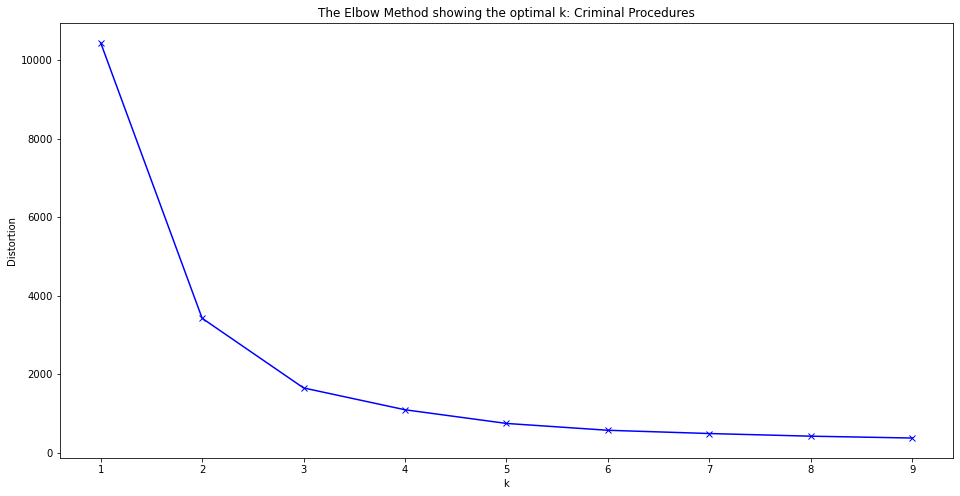

In [109]:
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Criminal Procedures')
plt.show()

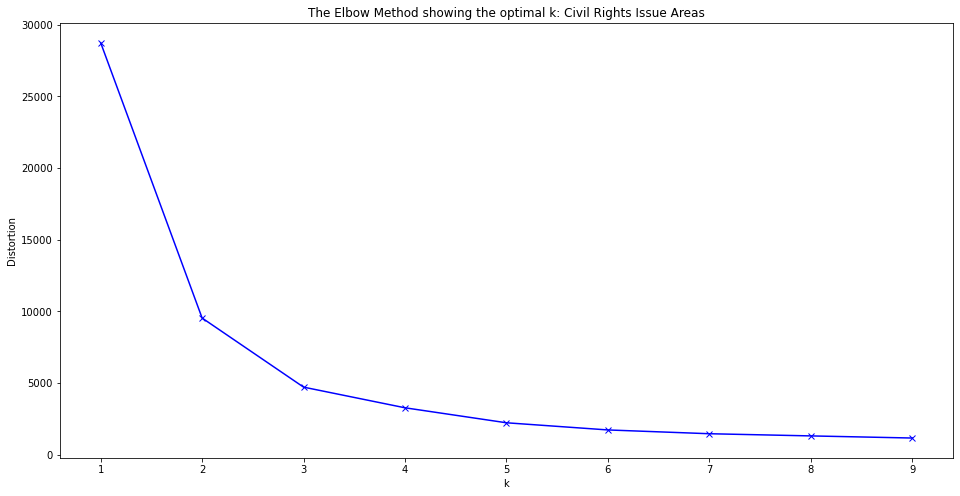

In [110]:
# Issue Area 2: Civil Rights
justiceCV = justice[issueArea == 2]
directionCV = direction[issueArea == 2]
dataset = pd.DataFrame({'justice': justiceCV, 'direction': directionCV})
dataset = dataset.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dataset)
    optimal.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Civil Rights Issue Areas')
plt.show()

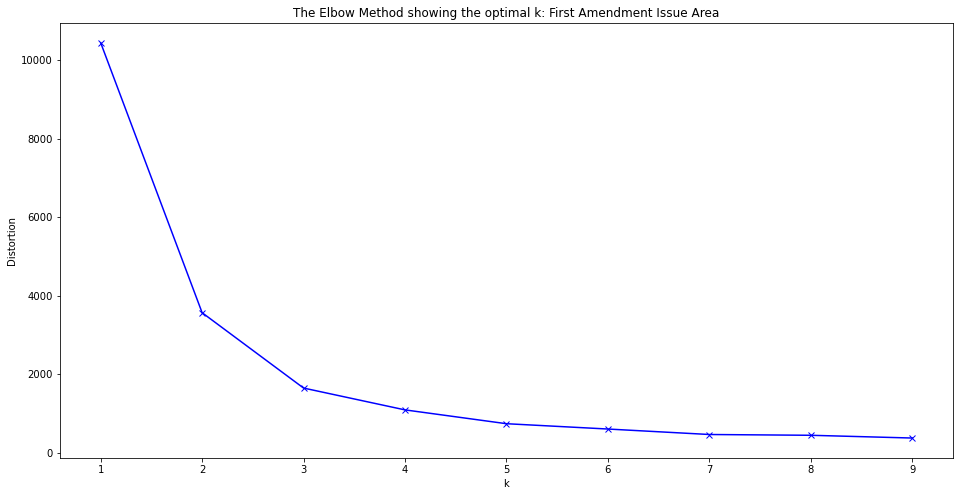

In [111]:
# Issue Area 3: First Amendment
justiceFA = justice[issueArea == 3]
directionFA = direction[issueArea == 3]
dataset = pd.DataFrame({'justice': justiceFA, 'direction': directionFA})
dataset = dataset.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dataset)
    optimal.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: First Amendment Issue Area')
plt.show()

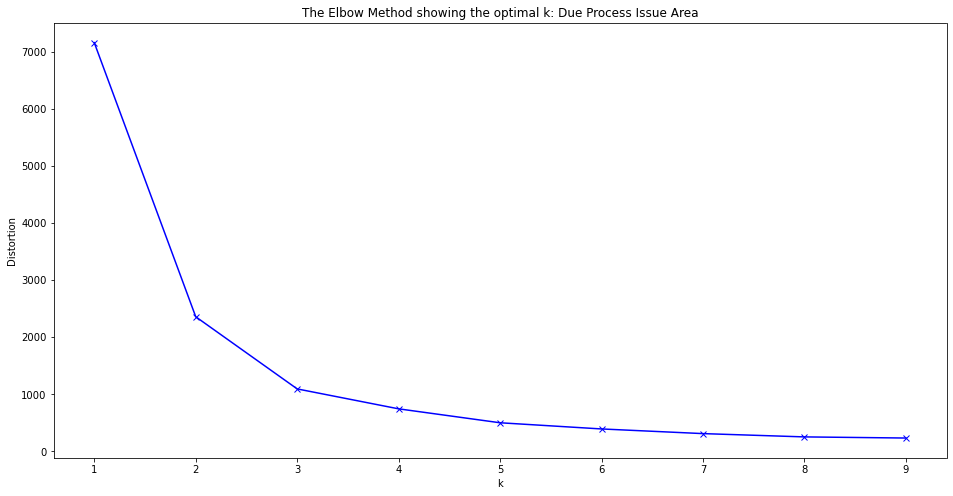

In [113]:
# Issue Area 4: Due Process
justiceDP = justice[issueArea == 4]
directionDP = direction[issueArea == 4]
dataset = pd.DataFrame({'justice': justiceDP, 'direction': directionDP})
dataset = dataset.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dataset)
    optimal.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Due Process Issue Area')
plt.show()

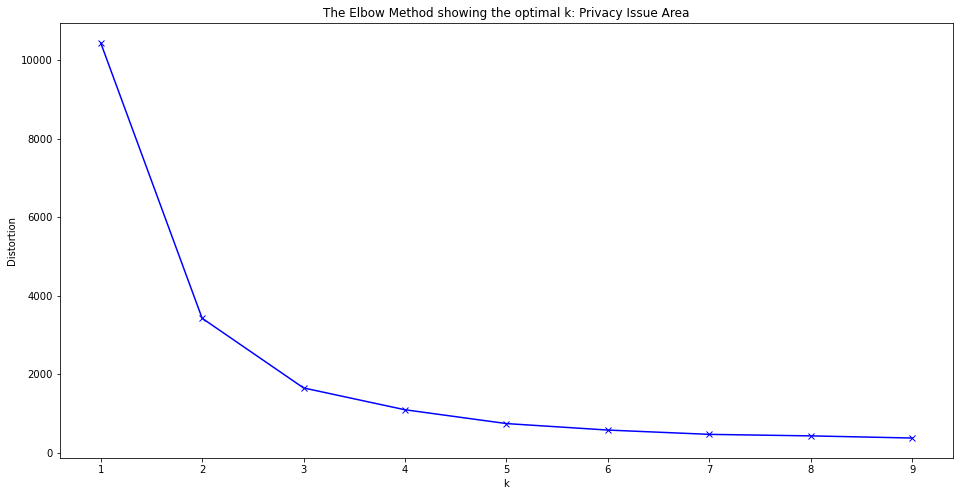

In [115]:
# Issue Area 5: Privacy
justiceP = justice[issueArea == 3]
directionP = direction[issueArea == 3]
dataset = pd.DataFrame({'justice': justiceP, 'direction': directionP})
dataset = dataset.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dataset)
    optimal.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Privacy Issue Area')
plt.show()

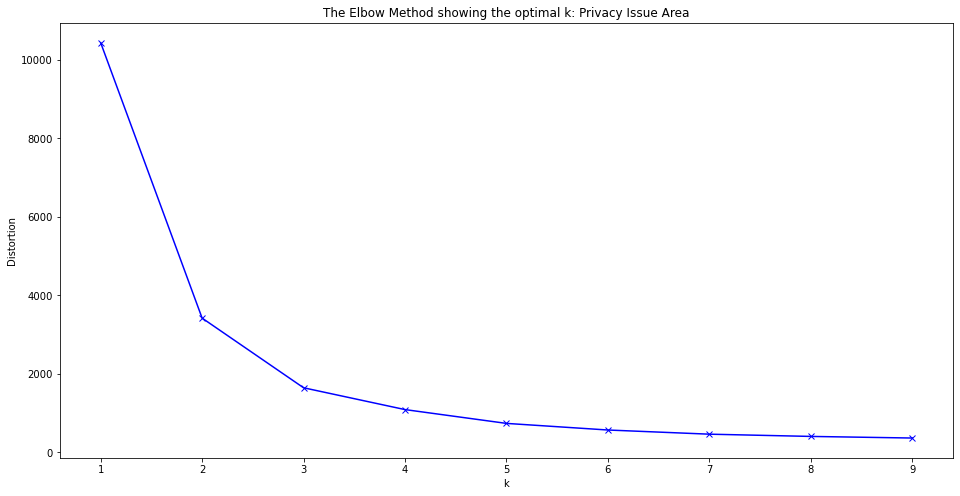

In [116]:
# Issue Area 6: Attorneys
justiceA = justice[issueArea == 3]
directionA = direction[issueArea == 3]
dataset = pd.DataFrame({'justice': justiceA, 'direction': directionA})
dataset = dataset.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dataset)
    optimal.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Privacy Issue Area')
plt.show()

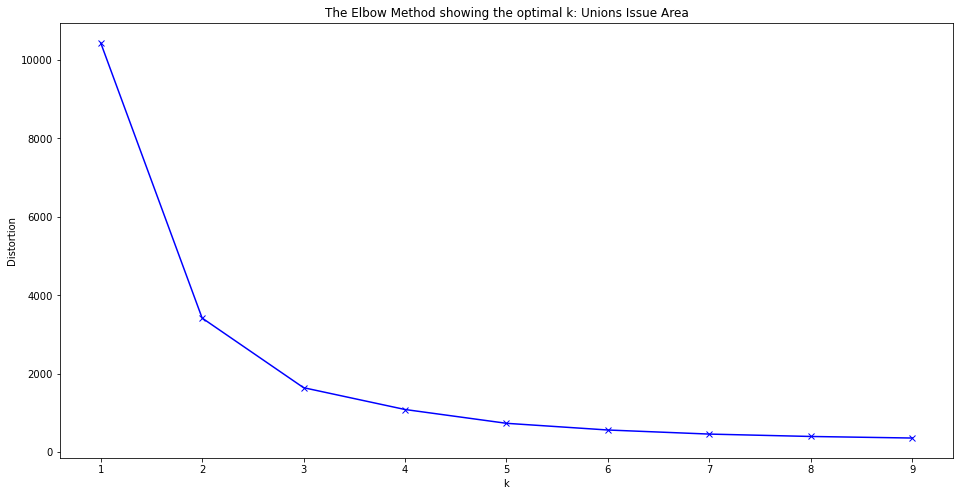

In [118]:
# Issue Area 7: Unions
justiceU = justice[issueArea == 3]
directionU = direction[issueArea == 3]
dataset = pd.DataFrame({'justice': justiceU, 'direction': directionU})
dataset = dataset.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
optimal = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dataset)
    optimal.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, optimal, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k: Unions Issue Area')
plt.show()